<a href="https://colab.research.google.com/github/Josh-XS/Project-2/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2

Joshua Nickell

Spanish Wine Quality Dataset

1. fedesoriano. (April 2022). Spanish Wine Quality Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

2. This is a set of over 7000 different types of wine and their various features.

3. The rating of the wine is the target.

4. One row represents a type of wine.

5. This is a classification problem.

6. There are 11 features.

7. There are 7500 rows.

8. I do not forsee any particular challenges working with this dataset.

##Loading Data

In [32]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import set_config
set_config(display='diagram')

In [33]:
#create and view dataframe
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRa6lJH575jdYrbRzM7BW8DvaY8hfID6AVfML_1RhmrBwkIXKuXn-yrm9ascN0QuOg4NObA4TnIIyQc/pub?gid=2015400164&single=true&output=csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [34]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


##Cleaning the Data

First I will copy the data for exploration, so that I don't overwrite the original.

In [35]:
#copy the data for exploration
eda_df = df.copy()

###Unnessecary Columns

Then I will drop the 'country' column becasue all of the wines are from Spain, and this will not affect the data.

In [36]:
#drop unnessecary columns
eda_df.drop(columns = 'country', inplace = True)

In [37]:
eda_df.head()

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


###Duplicate Columns

I will now check for any duplicate rows.

In [38]:
#check for duplicates
eda_df.duplicated().sum()

5452

There are 5452 duplicate rows

In [39]:
eda_df.shape

(7500, 10)

In [40]:
#drop duplicates
eda_df.drop_duplicates(inplace = True)

In [41]:
eda_df.shape

(2048, 10)

All duplicates have been dropped and there are now 2048 rows.

###Missing Values

Now I will check for missing values.

In [42]:
#check for missing values
eda_df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
region           0
price            0
type           106
body           271
acidity        271
dtype: int64

Because there were over 5000 duplicate rows dropped, I will not drop any missing values to keep as much data as possible.

I will create a loop to get the value counts of all of the columns so that I can find the most common values for each column, and check for any inconsistencies.

In [43]:
#loop to get all value counts
cols = eda_df.dtypes.index

for col in cols:
  print(f'- {col}:')
  print(df[col].value_counts(dropna=False))
  print("\n\n")

- winery:
Contino                                 457
Artadi                                  261
La Rioja Alta                           254
Sierra Cantabria                        237
Matarromera                             232
                                       ... 
Briego                                    1
Guillem Carol - Cellers Carol Valles      1
Particular                                1
Bodegas Asenjo & Manso                    1
Joan Simo                                 1
Name: winery, Length: 480, dtype: int64



- wine:
Reserva                         467
Gran Reserva                    458
Rioja Reserva                   240
El Viejo                        224
Corimbo I                       223
                               ... 
4 Varietales Coleccion Rioja      1
Noble                             1
Primordium                        1
Finca Helena                      1
Capricho Crianza                  1
Name: wine, Length: 847, dtype: int64



- year:
2011    11

The most common values seem to be much more common than the other values, so I will fill in the missing values with the most common in their column.

In [44]:
#fill missing values
eda_df.fillna({"year":2011, "type": 'Rioja Red', "body": 4.0, "acidity":3.0}, inplace = True)

In [45]:
eda_df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

There are no more missing values.

The loop also showed that there are no inconsistncies in the dataset.

##Exploring the Data

I will now get the data types of the values and try to find useful information in the numerical columns.

In [46]:
#get data types
eda_df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

###Histplots

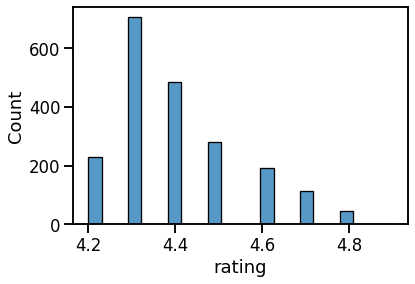

In [47]:
sns.histplot(data = eda_df['rating'])

It seems that the highest rating by far is 4.3, and counts seem to go down as rating goes up.

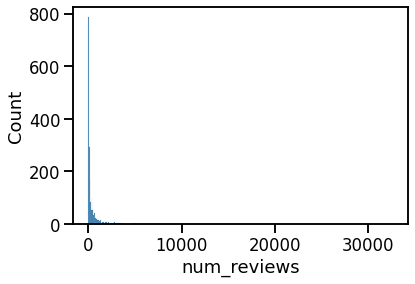

In [48]:
sns.histplot(data = eda_df['num_reviews'])

The majority of wines have under 1000 reviews, with most being under 800. There are a few large outliers with the largest being 30,000

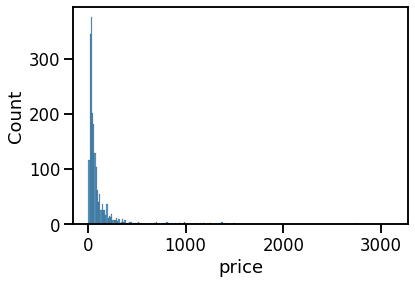

In [49]:
sns.histplot(data = eda_df['price'])

Most of the wines cost under 50 dollars, but there are some outliers, the largest being around 3000 dollars.

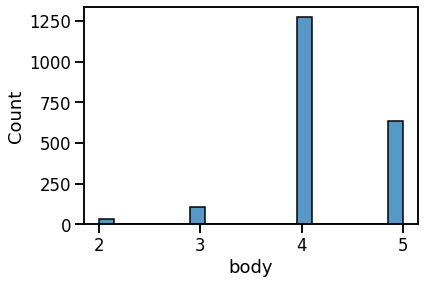

In [50]:
sns.histplot(data = eda_df['body'])

It seems most wines have a body of 4.0, with 5.0 wines being roughly half the amount. Very few wines have a body of 2.0 and 3.0.

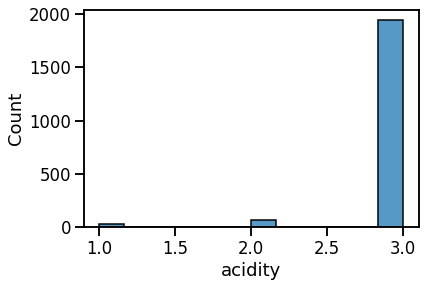

In [51]:
sns.histplot(data = eda_df['acidity'])

Almost all wines have an acidity around 3.00. The other numbers are almost negligible.

###Heatmap

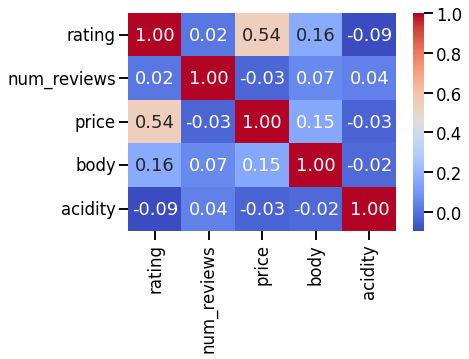

In [52]:
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')

This heat map shows that price seems to have the most affect on a wines rating.

##Explaining the Data

Text(0, 0.5, 'price')

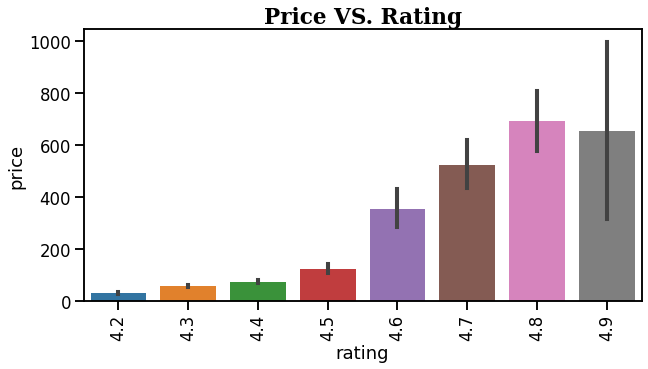

In [53]:
#create scatterplot and title
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = eda_df, x = 'rating', y = 'price')
sns.set_context('talk')
ax.set_title('Price VS. Rating',
             fontfamily = 'serif',
             fontsize = 'large', 
             fontweight = 'semibold');
plt.xticks(rotation = 90)

#change x and y axis font
ax.set_xlabel(ax.xaxis.get_label().get_text(),
    fontsize='medium')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
    fontsize='medium')


According to this bargraph, there is a clear postive correlation between rating and price. As the price goes up, so does the rating.

Text(0, 0.5, 'price')

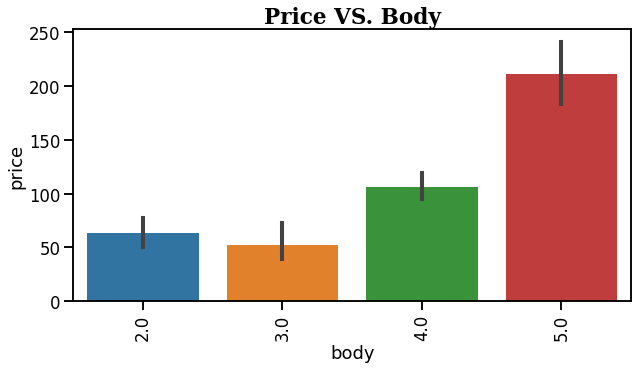

In [54]:
#create scatterplot and title
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(data = eda_df, x = 'body', y = 'price')
sns.set_context('talk')
ax.set_title('Price VS. Body',
             fontfamily = 'serif',
             fontsize = 'large', 
             fontweight = 'semibold');
plt.xticks(rotation = 90)

#change x and y axis font
ax.set_xlabel(ax.xaxis.get_label().get_text(),
    fontsize='medium')
ax.set_ylabel(ax.yaxis.get_label().get_text(),
    fontsize='medium')


A higher price also seems to indicate a higher body number, indicating that a higher body number likely equals better quality wine.

I seems that price has a decent  effect on the quality of the wine, which likely causes expensive wine to get better reviews.